# Required Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

# Importing and looking at data

In [2]:
data = pd.read_csv("banknote-dataset.csv")
data.head()

,variance,skew,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skew      1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
np.unique(data['class'],return_counts=True)

(array([0, 1]), array([762, 610]))

# Novice Exploration

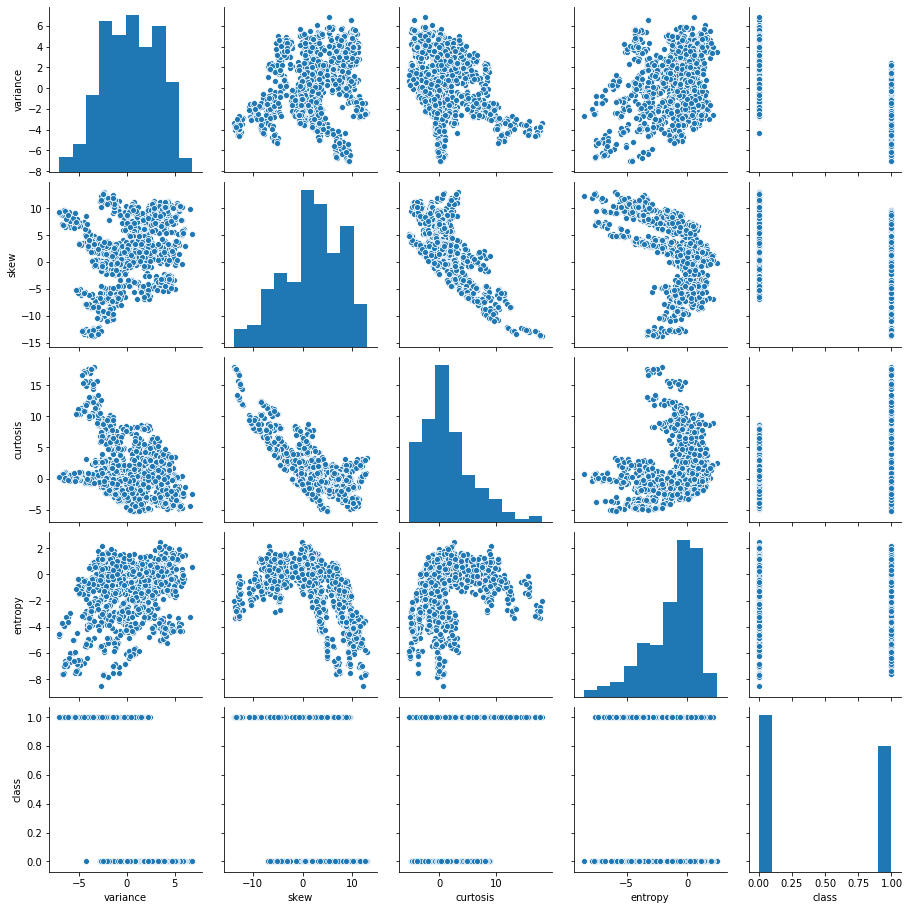

In [9]:
sns.pairplot(data)

# Preprocessing

In [10]:
X, y = data.drop(['class'],axis=1).to_numpy(), data['class'].to_numpy()

In [11]:
num_classes = len(np.unique(y))
y_oh = np.array([np.eye(num_classes)[i] for i in y])
y_oh

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X,y_oh,test_size=0.2,shuffle=True)

# Model
## Train

\begin{align}
y & = A.w \\
w & = (A^T.A)^{-1}.A^T.y
\end{align}


In [15]:
A = train_X
y = train_y

In [16]:
A.shape, y.shape

((1097, 4), (1097, 2))

In [17]:
w = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(y))

In [18]:
w.shape

(4, 2)

## Test

In [19]:
y_p = test_X.dot(w)
y_p.shape

(275, 2)

In [20]:
y_p = np.argmax(y_p,axis=1)
y_p.shape

(275,)

## Evaluation

In [21]:
test_y = np.argmax(test_y,axis=1)
test_y.shape

(275,)

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y,y_p)

array([[139,   6],
       [  0, 130]])

In [24]:
(139+130)/(139+130+6)

0.9781818181818182

# Library Function

In [25]:
regressor = LinearRegression()

In [26]:
regressor.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_p = regressor.predict(test_X)
y_p = np.argmax(y_p,axis=1)
y_p.shape

(275,)

In [28]:
confusion_matrix(test_y,y_p)

array([[142,   3],
       [  0, 130]])

In [29]:
(142+130)/(142+130+3)

0.9890909090909091